# Chapter 8: Simple Auto Encoder

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import UpSampling2D, Flatten, Reshape
from tensorflow.keras import regularizers

In [ ]:
# Loads the training and test data sets (ignoring class labels)
# ko có y test do là unsupervised learning
(x_train, _), (x_test, _) = mnist.load_data()

# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
np.prod(x_train.shape[1:])

784

In [ ]:
# x_train, x_test
# np.prod(x_train.shape[1:]): đổi thành tensor 1D
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
(x_train.shape, x_test.shape)

((60000, 784), (10000, 784))

In [ ]:
# input dimension = 784
input_dim = x_train.shape[1]

# giữ lại 32 chiều của input ~1/32 so với ban đầu
encoding_dim = 32 # du kien o nut co chai se co 32, ~1/25 

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

Compression factor: 24.5


In [ ]:
# Simple Autoencoder
autoencoder = Sequential()
#input dim = 748 => encoding_dim = 32 # encoder
autoencoder.add(Dense(encoding_dim, input_shape=(input_dim, ), activation='relu'))

# output_dim = input_dim = 784 => decoder
autoencoder.add(Dense(input_dim, activation='sigmoid'))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# dense_1 = input*output + bias = 784 * 32 + 32 = 25120 # encode
# dense_2 = input*output + bias = 32 * 784 + 784 = 25872 # decode

In [ ]:
# tách encoder ra để xem có cái gì
# KHI BUILD MODEL KO CẦN LÀM CÁI NÀY NHA, CÁI NÀY CHỈ COI CHO ZUI HOYY

# Encoder Model
input_img=Input(shape=(input_dim)) # input image = 784
encoder_layer=autoencoder.layers[0]  # lấy layer encode trong mảng autoencoder
encoder=Model(input_img,encoder_layer(input_img))

# Get encoder
encoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile 
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

# Unsupervised learning
# shuffle=True: xáo trộn dữ liệu lại mỗi epouch
autoencoder.fit(x_train,x_train,
                validation_data=(x_test,x_test),
                epochs=50,
                batch_size=256,
                shuffle=True)


Epoch 1/50
235/235 [==============================] - 4s 4ms/step - loss: 0.2774 - val_loss: 0.1925
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1710 - val_loss: 0.1521
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1427 - val_loss: 0.1330
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1278 - val_loss: 0.1208
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1177 - val_loss: 0.1123
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1105 - val_loss: 0.1065
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1055 - val_loss: 0.1023
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1020 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0993 - val_loss: 0.0970
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0974 - val_loss: 0.0954

In [ ]:
# get 10 random images
num_images=10
np.random.seed(42)
random_test_images=np.random.randint(x_test.shape[0],size=num_images)

#predict
encoded_imgs=encoder.predict(x_test)
decoded_imgs=autoencoder.predict(x_test)

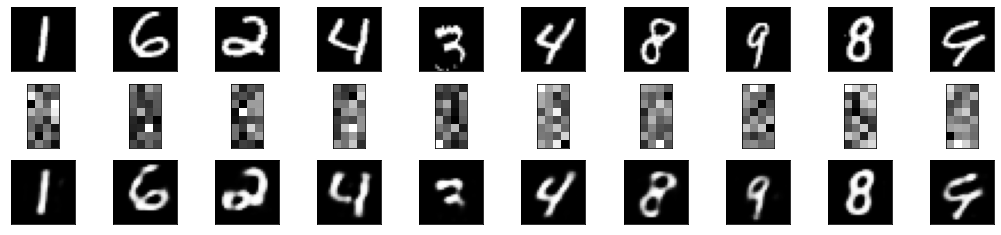

In [ ]:
plt.figure(figsize=(18, 4))
for i, image_idx in enumerate(random_test_images):
    # plot original image: hình gốc nè
    ax = plt.subplot(3, num_images, i + 1) # in hinh tren dong 1
    plt.imshow(x_test[image_idx].reshape(28, 28)) # tra lai hinh dang ban dau cho hinh
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image:  encoder nè
    ax = plt.subplot(3, num_images, num_images + i + 1) # in hinh tren dong 2
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4)) # hinh dang co chai 8 * 4
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image: hình tái tạo lại nè
    ax = plt.subplot(3, num_images, 2*num_images + i + 1) # in hinh tren dong 3
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28)) # tra lai hinh dang cua hinh output
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# save model
autoencoder.save('decoder.h5')
#print("save!!!")

In [ ]:
encoder.save('encoder.h5')

In [ ]:
# o mot noi nao do...
# Predicting on Test Data, model load from file
from tensorflow.keras.models import load_model
encoder = load_model('encoder.h5')
decoder = load_model('decoder.h5')

In [ ]:
# decoder = autoencoder

In [ ]:
num_images = 5
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(x_test)

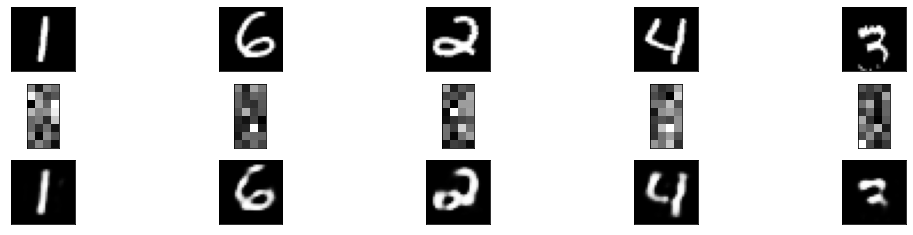

In [ ]:
plt.figure(figsize=(18, 4))
for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

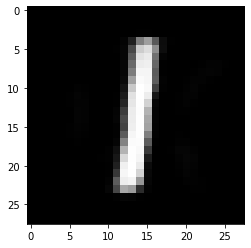

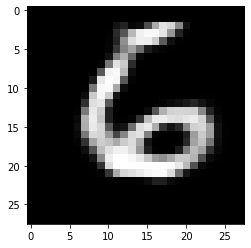

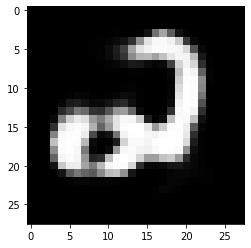

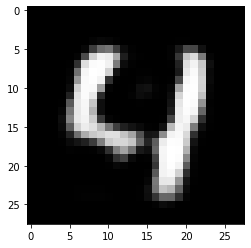

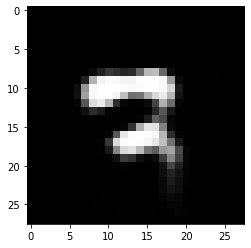

In [ ]:
for i, image_idx in enumerate(random_test_images): 
    # plot reconstructed image    
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    image_name = "demo_Simple/image_" + str(image_idx) + ".jpg"
    plt.savefig(image_name)   
    plt.show()